# WeatherPy
#### By: Anis Ali
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?q='

#Define values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Looping through cities for API calls
count = 1
for city in cities:
    city = city
    qry_url = url + city + '&units=imperial&appid=' + weather_api_key
    response = requests.get(qry_url).json()
    
# Try and except for API calls
    try:
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"Processing record {count}: {city}")
        count = count + 1
    except (KeyError):
        print("City not found. Skipping...")

City not found. Skipping...
Processing record 1: faanui
Processing record 2: antofagasta
Processing record 3: oksfjord
Processing record 4: jamestown
Processing record 5: havre-saint-pierre
City not found. Skipping...
Processing record 6: bengkulu
Processing record 7: la palma
Processing record 8: punta arenas
Processing record 9: le port
Processing record 10: albany
Processing record 11: guanica
Processing record 12: kutno
Processing record 13: vaiano
Processing record 14: port elizabeth
Processing record 15: bluff
Processing record 16: vaini
Processing record 17: la roda
Processing record 18: souillac
Processing record 19: samarai
City not found. Skipping...
City not found. Skipping...
Processing record 20: shimoda
City not found. Skipping...
Processing record 21: georgetown
Processing record 22: rikitea
Processing record 23: santa lucia
Processing record 24: new norfolk
Processing record 25: lagoa
Processing record 26: mataura
Processing record 27: butaritari
Processing record 28: h

Processing record 235: magway
Processing record 236: dharchula
Processing record 237: alpena
Processing record 238: morondava
Processing record 239: batsfjord
Processing record 240: montreal
Processing record 241: oum hadjer
Processing record 242: kristiinankaupunki
Processing record 243: komsomolskiy
Processing record 244: glencoe
Processing record 245: kenora
Processing record 246: conakry
Processing record 247: rawson
Processing record 248: neiafu
Processing record 249: aquiraz
Processing record 250: joshimath
Processing record 251: maceio
Processing record 252: dryden
Processing record 253: honningsvag
Processing record 254: kabanga
Processing record 255: healesville
Processing record 256: cap malheureux
Processing record 257: lerwick
Processing record 258: berdigestyakh
Processing record 259: arlit
Processing record 260: vestmanna
Processing record 261: cayenne
Processing record 262: cherskiy
Processing record 263: port-cartier
Processing record 264: eregli
Processing record 265: 

Processing record 478: mayskiy
Processing record 479: san lorenzo
City not found. Skipping...
City not found. Skipping...
Processing record 480: bilibino
Processing record 481: mocuba
City not found. Skipping...
Processing record 482: san miguel
Processing record 483: lufilufi
Processing record 484: ampanihy
Processing record 485: satana
Processing record 486: igarka
Processing record 487: nadym
Processing record 488: laguna
City not found. Skipping...
Processing record 489: mahajanga
City not found. Skipping...
Processing record 490: manggar
Processing record 491: kabare
Processing record 492: tessalit
Processing record 493: marathon
Processing record 494: lakes entrance
Processing record 495: ust-kuyga
Processing record 496: puerto baquerizo moreno
Processing record 497: mielec
Processing record 498: san juan
Processing record 499: kalmunai
Processing record 500: ulaangom
Processing record 501: praia
Processing record 502: galesong
Processing record 503: freetown
Processing record 50

### Convert Raw Data to DataFrame

In [5]:
# Export the city data into a .csv.
# Display the DataFrame

weather_df = pd.DataFrame({
                        "City":city_name, 
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Humidity":humidity,
                        "Cloudiness":cloudiness,
                        "Wind Speed":wind_speed,
                        "Country":country, 
                        "Date":date
                        })
                        
#Exporting data to csv
weather_df.to_csv("Resources/Cities.csv")

#Displaying dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,80.4,77,68,17.83,PF,1603752984
1,Antofagasta,-23.65,-70.40,60.8,72,90,13.87,CL,1603753336
2,Øksfjord,70.24,22.35,35.6,73,0,13.87,NO,1603753473
3,Jamestown,42.10,-79.24,45.0,93,90,4.70,US,1603752995
4,Havre-St-Pierre,50.23,-63.60,32.0,80,90,4.70,CA,1603753210


In [6]:
weather_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

#### Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,5.840000e+02
mean,19.402158,16.055325,58.355068,73.484589,54.195205,7.919966,1.603753e+09
std,33.151225,89.975360,21.324219,21.273030,39.202770,5.684326,1.902087e+02
min,-54.800000,-175.200000,-7.600000,4.000000,0.000000,0.630000,1.603753e+09
25%,-8.810000,-63.005000,44.460000,65.000000,9.000000,4.000000,1.603753e+09
50%,22.175000,19.960000,64.000000,80.000000,67.000000,6.490000,1.603753e+09
75%,46.852500,92.120000,75.200000,88.000000,90.000000,10.290000,1.603754e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,32.210000,1.603754e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

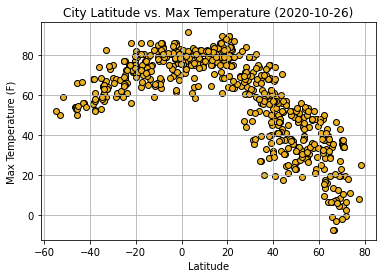

In [8]:
# Converting Date for title of plot
timestamp = weather_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Max Temp"],
            marker = "o", 
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({shortened_timestamp})")
plt.savefig("Output/Lat vs Temp Plot")
plt.show()

## Latitude vs. Humidity Plot

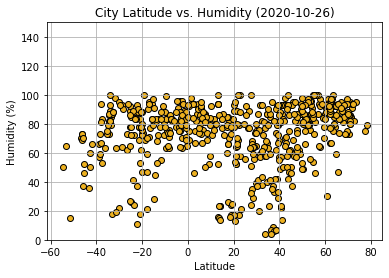

In [22]:
# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Humidity"],
            marker = "o",
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.ylim(0, weather_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("Output/Lat vs Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

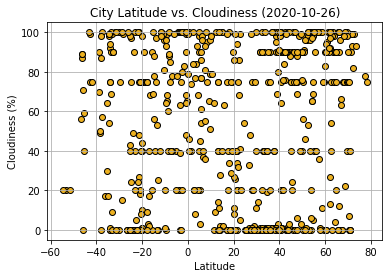

In [21]:
# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Cloudiness"],
            marker = "o",
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("Output/Lat vs Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

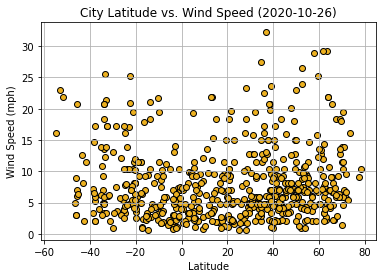

In [11]:
# Creating plot
plt.scatter(weather_df["Lat"],
            weather_df["Wind Speed"],
            marker = "o",
            color = "#EDB120",
            edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("Output/Lat vs Wind Speed Plot")
plt.show()

## Linear Regression

In [12]:
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()
    
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8478328504661148


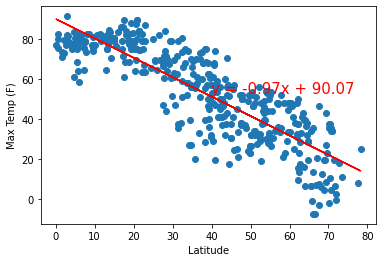

None


In [13]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7270899843984789


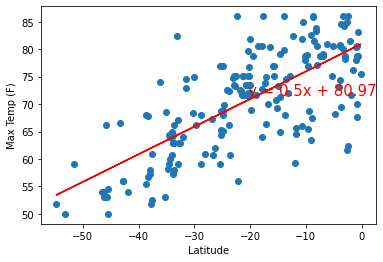

None


In [14]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21970738807368723


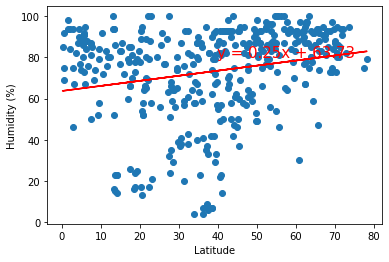

None


In [15]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2616228941148505


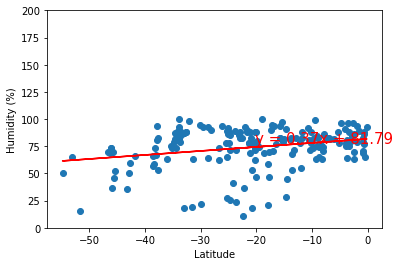

None


In [16]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15366898260117837


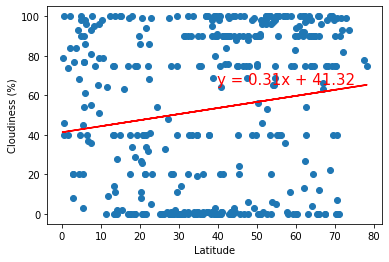

None


In [17]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11426147915766997


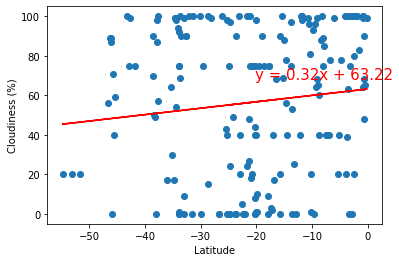

None


In [18]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness (%)")
print(linear_reg_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1647851049640302


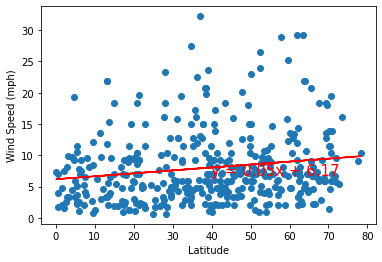

None


In [19]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2903731906452538


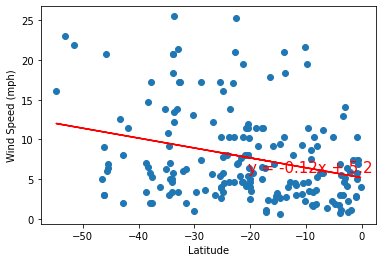

None


In [20]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
print(linear_reg_plot(x_values,y_values))

In [ ]:
# End